Integrantes:
- Angela Gonzalez
- Juan Casanova
- Juliana Filigrana

# Parte 1

##  Análisis Exploratorio de Datos (EDA):


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
%matplotlib inline

In [9]:
#Loading our data
df = pd.read_excel('HISTORICO_SUERTES.xlsx')

In [10]:
#Numero de filas y columnas
df.shape

(21027, 85)

In [11]:
#Tipos de varibles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

In [12]:
#Cargar las primeras filas
df.head()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Resumen estadistico
df.describe()

,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,F.Siembra,Ult.Riego,Edad Ult Cos,F.Ult.Corte,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
count,21027.000000,21027.000000,21026.000000,21027.000000,21022.000000,21027.000000,21027,8470,21027.00000,21027,...,4530.000000,4530.000000,4530.000000,0.0,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000
mean,202039.708708,80679.334427,46.448730,8.642948,25.311806,4.261806,2015-03-11 18:18:44.839492096,2020-02-16 21:24:26.351829760,13.01111,2020-10-27 09:01:09.339420672,...,80.764679,16.059757,24.556072,NaN,435.119397,438.344500,298.258587,1209.462980,442.941369,1912.479868
min,201701.000000,80100.000000,11.000000,0.004000,1.100000,0.000000,1986-04-30 00:00:00,2016-01-12 00:00:00,1.31000,2017-01-02 00:00:00,...,63.327000,12.500000,22.353000,NaN,352.013000,367.315000,23.100000,23.100000,190.400000,190.400000
25%,201812.000000,80247.000000,31.000000,3.310000,12.000000,1.000000,2013-03-13 00:00:00,2018-03-07 00:00:00,11.93000,2018-12-14 00:00:00,...,80.038000,15.200000,22.946250,NaN,421.344750,426.533250,221.650000,998.900000,416.800000,1729.900000
50%,202010.000000,80453.000000,51.000000,7.000000,21.900000,3.000000,2015-11-10 00:00:00,2019-08-14 00:00:00,12.62000,2020-10-11 00:00:00,...,81.291500,15.700000,23.201500,NaN,436.591000,439.140000,296.900000,1181.150000,440.950000,1885.200000
75%,202209.000000,81104.000000,51.000000,12.075000,32.700000,6.000000,2018-08-07 00:00:00,2022-05-19 00:00:00,13.86000,2022-09-25 00:00:00,...,82.440500,16.800000,25.660000,NaN,449.274000,450.391000,373.300000,1391.850000,465.800000,2057.800000
max,202407.000000,82557.000000,91.000000,65.000000,155.000000,31.000000,2023-09-08 00:00:00,2024-06-27 00:00:00,78.19000,2024-07-10 00:00:00,...,84.816000,19.700000,32.358000,NaN,500.212000,485.672000,618.000000,3783.700000,614.300000,4971.800000
std,216.642895,590.030150,21.513498,7.049533,18.237344,4.111935,NaN,NaN,1.97907,NaN,...,2.752029,1.300131,2.471964,NaN,21.307392,18.582606,102.901635,340.463189,43.680452,307.978328


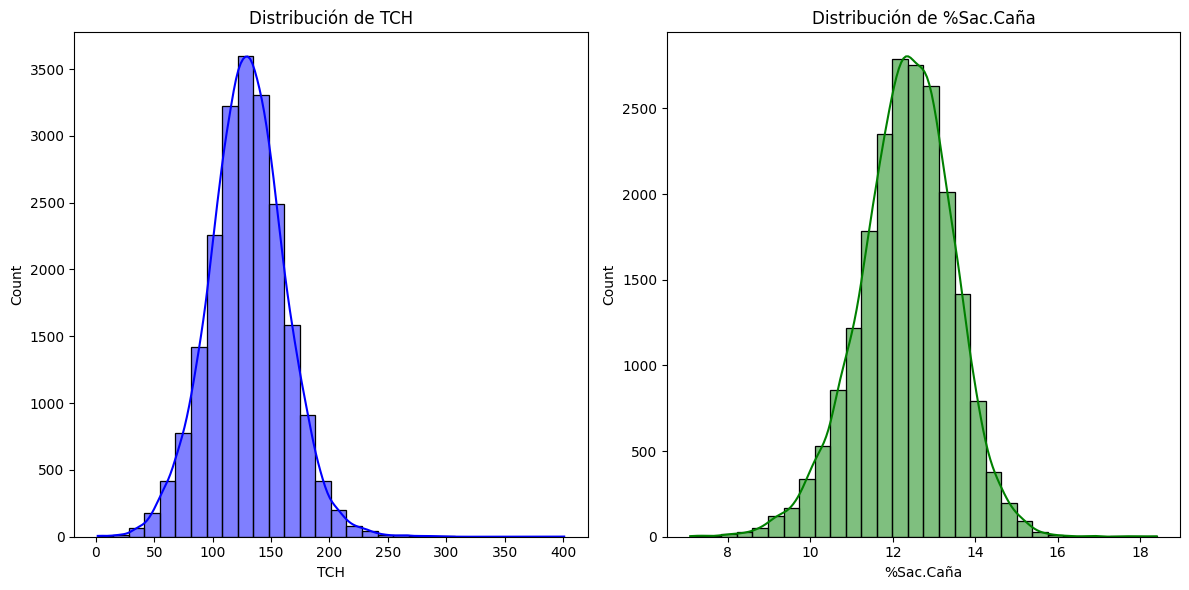

In [15]:
# Visualizar la distribución de las variables de interés
plt.figure(figsize=(12, 6))

# Gráfico de la distribución de 'TCH'
plt.subplot(1, 2, 1)
sns.histplot(df['TCH'], kde=True, color='blue', bins=30)
plt.title('Distribución de TCH')

# Gráfico de la distribución de '%Sac.Caña'
plt.subplot(1, 2, 2)
sns.histplot(df['%Sac.Caña'], kde=True, color='green', bins=30)
plt.title('Distribución de %Sac.Caña')

plt.tight_layout()
plt.show()



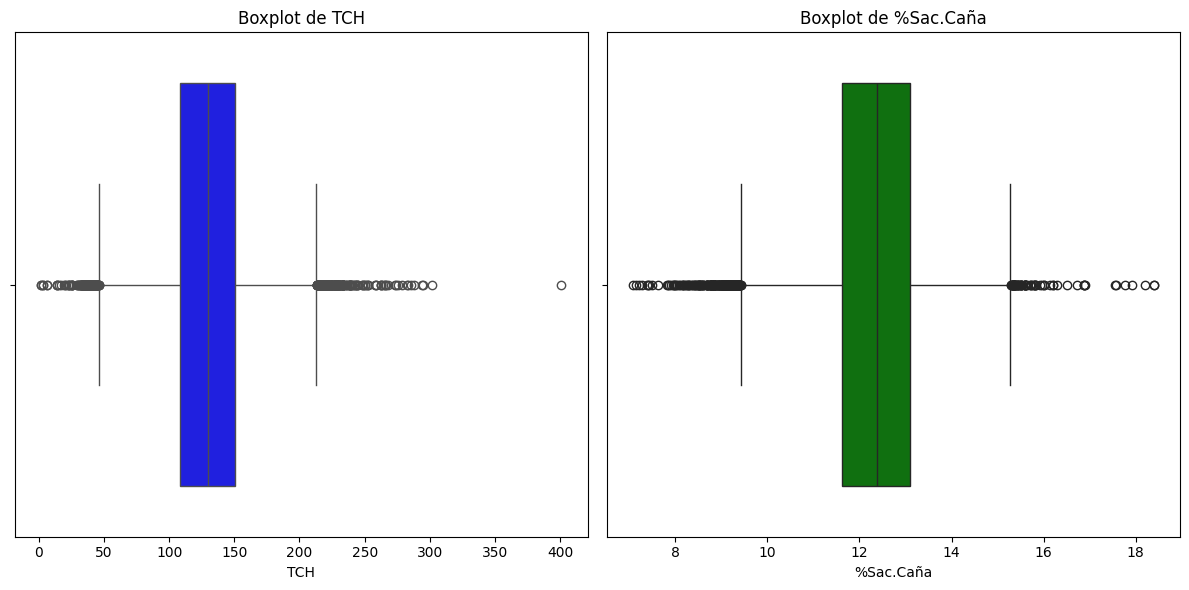

In [16]:
# Identificación de outliers utilizando un gráfico de caja (boxplot)
plt.figure(figsize=(12, 6))

# Boxplot para 'TCH'
plt.subplot(1, 2, 1)
sns.boxplot(x=df['TCH'], color='blue')
plt.title('Boxplot de TCH')

# Boxplot para '%Sac.Caña'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['%Sac.Caña'], color='green')
plt.title('Boxplot de %Sac.Caña')

plt.tight_layout()
plt.show()

TCH (Toneladas de caña por hectárea) tiene una alta variabilidad, con algunos valores atípicos que indican campos con rendimiento mucho mayor que el promedio. La distribución está sesgada hacia la derecha, con la mayoría de los valores bajos.

%Sac.Caña (Porcentaje de sacarosa) tiene una distribución más equilibrada, concentrándose principalmente entre 9% y 13%, con algunos valores atípicos pero menos pronunciados que en TCH.

In [28]:
#Limpieza de datos 
df_clean = df.copy()

In [51]:
#Número de valores nulos por columna:
df_clean.isnull().sum()

Período                      0
Hacienda                     0
Nombre                       0
Zona                         0
Tenencia                     1
                         ...  
Radiacion Solar Ciclo    16497
Precipitacion 0_3        16497
Precipitacion Ciclo      16497
Evaporacion 0-3          16497
Evaporacion Ciclo        16497
Length: 85, dtype: int64

In [57]:
from sklearn.impute import SimpleImputer

# Copiar el DataFrame original para no sobrescribirlo
df_cleaned = df.copy()

# **Eliminar columnas que están completamente vacías (sin valores válidos)**
df_cleaned = df_cleaned.loc[:, df_cleaned.notnull().any(axis=0)]  # Eliminar columnas sin ningún valor válido

# **1. Imputar columnas numéricas con la media**
# Seleccionar solo las columnas numéricas
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Imputar con la media para las columnas numéricas
imputer_numeric = SimpleImputer(strategy='mean')  # O strategy='median' si prefieres la mediana
df_cleaned[numeric_columns] = imputer_numeric.fit_transform(df_cleaned[numeric_columns])

# **2. Imputar columnas categóricas con la moda (valor más frecuente)**
# Seleccionar solo las columnas categóricas
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Imputar con la moda para las columnas categóricas
imputer_cat = SimpleImputer(strategy='most_frequent')
df_cleaned[categorical_columns] = imputer_cat.fit_transform(df_cleaned[categorical_columns])

# **Verificar si ya no hay valores nulos**
print(df_cleaned.isnull().sum())  # Esto debería imprimir 0 para todas las columnas


Período                  0
Hacienda                 0
Nombre                   0
Zona                     0
Tenencia                 0
                        ..
Radiacion Solar Ciclo    0
Precipitacion 0_3        0
Precipitacion Ciclo      0
Evaporacion 0-3          0
Evaporacion Ciclo        0
Length: 83, dtype: int64


##  Desarrollo de Modelos:

                            TCH  %Sac.Caña
Período               -0.122134  -0.120753
Hacienda              -0.051714   0.050982
Tenencia              -0.021055   0.038158
Area Neta              0.093021   0.113064
Dist Km               -0.048510   0.048021
...                         ...        ...
Radiacion Solar Ciclo  0.113209   0.049930
Precipitacion 0_3     -0.085304   0.045613
Precipitacion Ciclo    0.026100  -0.010124
Evaporacion 0-3        0.185401  -0.072548
Evaporacion Ciclo      0.260934   0.134239

[67 rows x 2 columns]


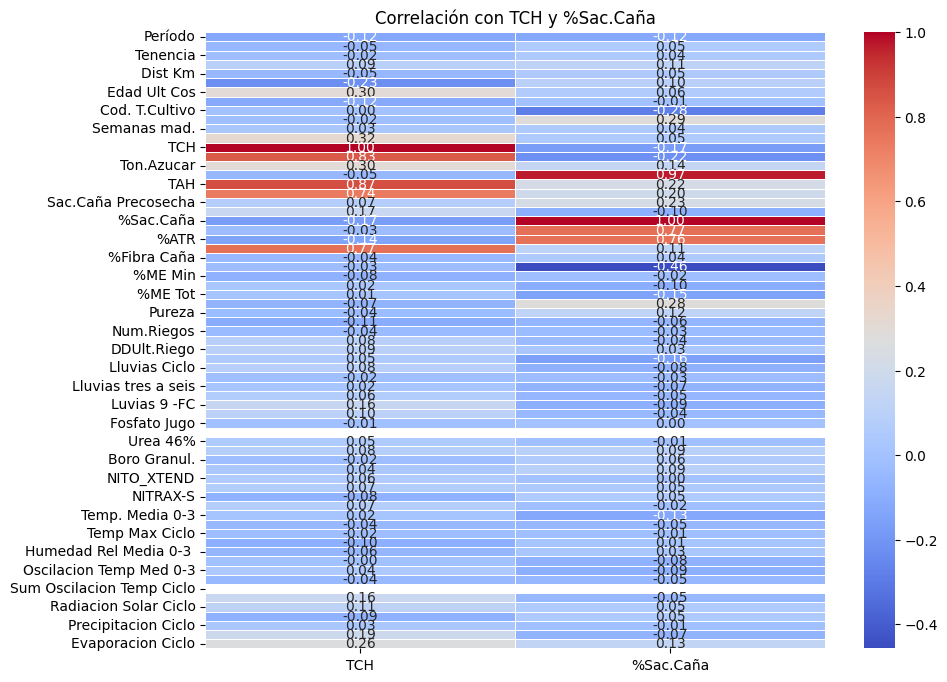

In [43]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Correlación entre las variables numéricas y TCH, %Sac.Caña
correlation_matrix = df[numeric_columns].corr()

print(correlation_matrix[['TCH', '%Sac.Caña']])

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['TCH', '%Sac.Caña']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlación con TCH y %Sac.Caña')
plt.show()


Variables más correlacionadas con TCH: ['TCH', 'TCHM', 'TAH', 'TAHM', 'KATRHM']
Variables más correlacionadas con %Sac.Caña: ['Rdto', '%Sac.Caña', '%Sac.Muestreadora', '%ATR']


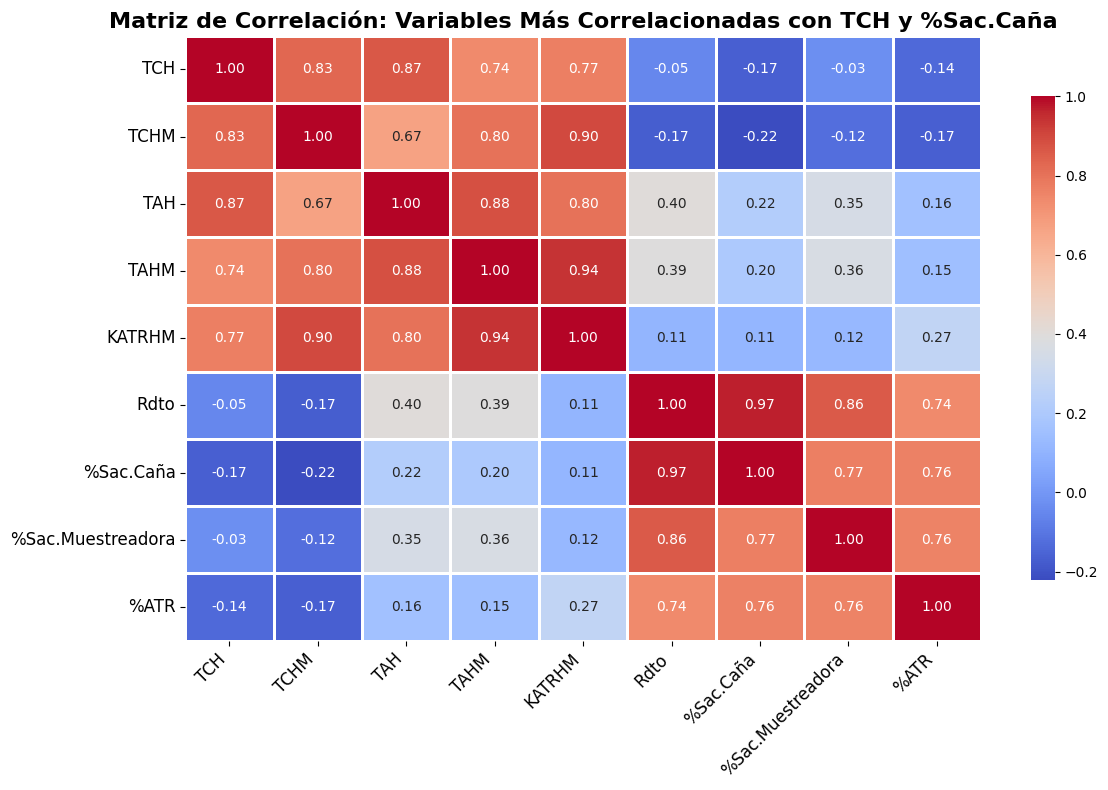

In [44]:

# Definir un umbral de correlación para considerar variables importantes (por ejemplo, 0.7 o -0.7)
threshold = 0.7

# Filtrar las variables más correlacionadas con TCH y %Sac.Caña
correlated_tch = correlation_matrix['TCH'][abs(correlation_matrix['TCH']) > threshold].index.tolist()
correlated_sac = correlation_matrix['%Sac.Caña'][abs(correlation_matrix['%Sac.Caña']) > threshold].index.tolist()

# Mostrar las variables más correlacionadas con TCH y %Sac.Caña
print("Variables más correlacionadas con TCH:", correlated_tch)
print("Variables más correlacionadas con %Sac.Caña:", correlated_sac)

plt.figure(figsize=(12, 8))

# Visualizar las variables más correlacionadas con TCH y %Sac.Caña
sns.heatmap(correlation_matrix.loc[correlated_tch + correlated_sac, correlated_tch + correlated_sac], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8, linecolor='white', cbar_kws={'shrink': 0.8})

plt.title('Matriz de Correlación: Variables Más Correlacionadas con TCH y %Sac.Caña', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


In [58]:
## Predecir TCH
from sklearn.linear_model import LinearRegression

# Selección de las variables predictoras (más correlacionadas con TCH)
X = df_cleaned[['TCHM', 'TAH', 'TAHM', 'KATRHM']]  # Variables predictoras
y = df_cleaned['TCH']  # Variable dependiente

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir los resultados
print('Error Cuadrático Medio (MSE):', mse)
print('R^2:', r2)

# Mostrar los coeficientes del modelo
print('\nCoeficientes del modelo:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

NameError: name 'mean_squared_error' is not defined